In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

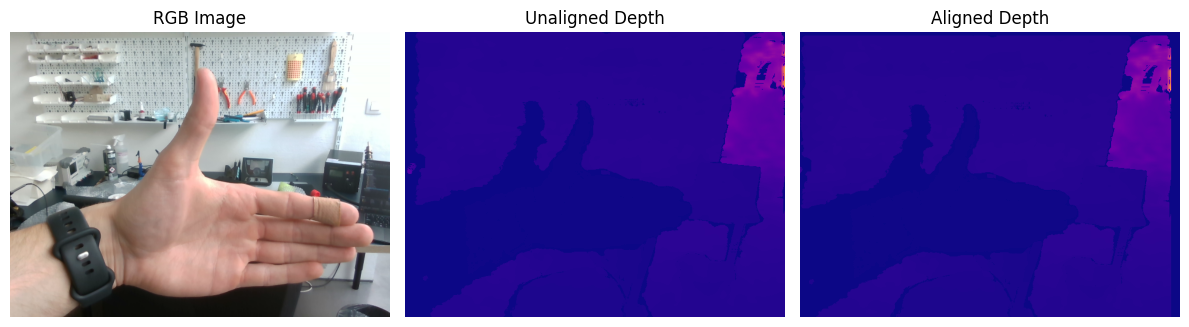

In [8]:
# Load images
rgb = cv2.imread("../data/saved_images/409238553452200_color.png")
depth_colormap = cv2.imread("../data/saved_images/409238553452200_depth.png", cv2.IMREAD_UNCHANGED)

# Convert BGR to RGB for matplotlib
rgb_rgb = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)

# Resize if needed
depth_resized = cv2.resize(depth_colormap, (rgb.shape[1], rgb.shape[0]))

# === Try an approximate alignment ===
# D435 has around a 2.5cm baseline between RGB and IR, which translates to several pixels at 640x480
dx, dy = -15, 6  # You can tweak these manually by eye

M = np.float32([[1, 0, dx], [0, 1, dy]])
aligned_depth = cv2.warpAffine(depth_resized, M, (rgb.shape[1], rgb.shape[0]))

# === Show results ===
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("RGB Image")
plt.imshow(rgb_rgb)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Unaligned Depth")
plt.imshow(depth_resized, cmap='plasma')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Aligned Depth")
plt.imshow(aligned_depth, cmap='plasma')
plt.axis("off")

plt.tight_layout()
plt.show()
